In [49]:
using Plots
using DelimitedFiles
using StatsBase
using Normalization
using JLD2

In [4]:
train_data = readdlm("/Users/joshua/Documents/QuantumInspiredML/LogLossAlternative/datasets/sunspot_train.txt");
test_data = readdlm("/Users/joshua/Documents/QuantumInspiredML/LogLossAlternative/datasets/sunspot_test.txt");

In [11]:
X_train = train_data[:, 2:end]
y_train = Int.(train_data[:, 1])
X_test = test_data[:, 2:end]
y_test = Int.(test_data[:, 1]);

In [12]:
countmap(y_train)

Dict{Int64, Int64} with 2 entries:
  0 => 204
  1 => 204

In [13]:
countmap(y_test)

Dict{Int64, Int64} with 2 entries:
  0 => 68
  1 => 68

In [66]:
rs = RobustSigmoid(X_train);
X_train_scaled = rs(X_train);
X_train_scaled_unscaled = denormalize(X_train_scaled, rs);

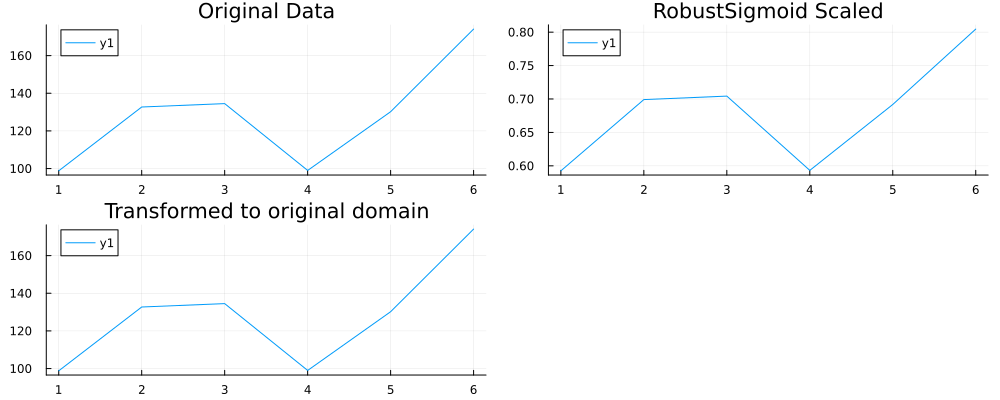

In [77]:
idx = 98
p1 = plot(X_train[idx,:], title="Original Data")
p2 = plot(X_train_scaled[idx,:], title="RobustSigmoid Scaled")
p3 = plot(X_train_scaled_unscaled[idx,:], title="Transformed to original domain")
plot(p1, p2, p3, size=(1000, 400))

In [78]:
@save "sunspot_train.jld2" X_train y_train

In [79]:
@save "sunspot_test.jld2" X_test y_test